In [1]:
import dipolarBEC

In [2]:
# necessary python modules

from tqdm import tqdm
import numpy as np
import os
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

In [3]:
#check which interaction is used and save fig in the appropriate subfolder

fv = 'NN'  # 'd' or 'NN'

path_dict = {
    'd': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\dip\\",
    'NN': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\NN\\"
}

fpath = path_dict.get(fv, "Default path")

In [4]:
#parameters

Ndisr = 1 #only one disorder realization
Nmesh = 100

N0 = 2
N1=100
N2=250
N3=500

kx_small = 0.01
kx_large_dict = {'d': 8.0, 'NN': 25.0}
kx_large = kx_large_dict.get(fv, "Default value")

Uc = 1.0

#NN: Ud << Uc/2, d: Ud << Uc/3
Ud1_dict = {'d': 0.0, 'NN': 0.0}
Ud2_dict = {'d': 0.02, 'NN': 0.025}
Ud3_dict = {'d': 0.03, 'NN': 0.05}
Ud1 = Ud1_dict.get(fv, "Default value")
Ud2 = Ud2_dict.get(fv, "Default value")
Ud3 = Ud3_dict.get(fv, "Default value")

sigma1 = 0.0
sigma2 = 0.1
sigma3 = 0.2

t1 = 1.0
t2 = 10.0
t3 = 15.0

Ns = [N1, N2, N3]
kxs = [kx_small, kx_large]
sigmas = [sigma1, sigma2, sigma3]
Uds = [Ud1, Ud2, Ud3]

markers = ['s', 'o', '^']

In [5]:
# string manipulation for filename
def rp(txt):
    txt = str(txt)
    return (txt.replace('.','p')).replace('-','m')
def get_fname(begin, params, end):
    # given a dictionary of parameters,
    # create a string that makes a good file name
    keys = list( params.keys() )
    fname = begin
    for prm in keys:
        prm_val = params[prm]
        prm_name = prm
        if type(prm_val)==str:
            fname += '_' + rp( prm_name + prm_val)
        elif int(prm_val) == prm_val:
            fname += '_' + rp( prm_name+'%d'%prm_val)
        else:
            fname += '_' + rp( prm_name+'%3.2f'%prm_val)
    fname += end
    return fname

In [30]:
Ud = Uds[2]
sigma = sigmas[2]
Ntar = np.asarray([10, 50, 100, 150, 200, 250, 500, 1000, 2000])#, 5000, 10000])
# Change the way NumPy handles underflow
np.seterr(under='ignore')
# Take the inverse of each element
INtar = 1.0 / Ntar
kxar = np.asarray([0.01]) #np.linspace(kx_small, kx_large, Nmesh)
par = {'Ud': Ud, 'sigma': sigma, 'kx': kxar[0]}
tosave = []
iprs = []
for N in tqdm(Ntar):
    print(N)
    nb = np.random.uniform(1-sigma, 1+sigma, N)
    for k in kxar:
        # NN interaction
        run = dipolarBEC.dipolarBEC(N, k, Uc, Ud, Ndisr, sigma)
        val, ipr = run.iprAllStates(nb)
        iprs.append(ipr[0])
        for en, iprval in zip(val, ipr):
            tosave.append([N, en, iprval])

# Fit a line to the data
            
coefficients = np.polyfit(INtar, iprs, 1)
slope = coefficients[0]
intercept = coefficients[1]

'''# Convert to a numpy array and save to a npy file
tosave = np.asarray( tosave, dtype=np.float64 )
np.save(get_fname(fpath+fv, par, '.npy'), tosave)
#np.save('test.npy', tosave)

'''#tosave = pd.DataFrame(tosave)
# Save to a CSV file
#tosave.to_csv('test.csv', header=False, index=False)'''

 33%|███▎      | 3/9 [00:00<00:00, 17.76it/s]

10
50
100
150
200


 56%|█████▌    | 5/9 [00:00<00:00,  4.92it/s]

250


 67%|██████▋   | 6/9 [00:01<00:00,  3.40it/s]

500


 78%|███████▊  | 7/9 [00:05<00:02,  1.23s/it]

1000


 89%|████████▉ | 8/9 [00:21<00:05,  5.51s/it]

2000


100%|██████████| 9/9 [01:44<00:00, 11.56s/it]


"# Convert to a numpy array and save to a npy file\ntosave = np.asarray( tosave, dtype=np.float64 )\nnp.save(get_fname(fpath+fv, par, '.npy'), tosave)\n#np.save('test.npy', tosave)\n\n"

In [31]:
print(INtar)

[0.1        0.02       0.01       0.00666667 0.005      0.004
 0.002      0.001      0.0005    ]


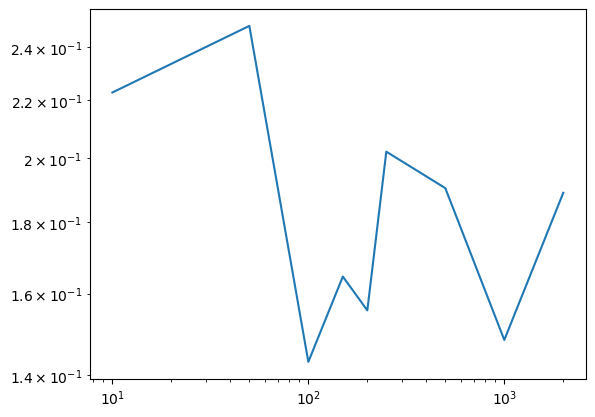

In [33]:
plt.plot(Ntar, iprs, label='Data')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
#load from a numpy file
#data = np.load(get_fname(fpath+fv, par, '.npy'))
#data = np.load('test.npy')

'''# Load from a CSV file
#data = pd.read_csv('test.csv', header=None, index_col=None)

#no rows or columns names
#tosave.reset_index(drop=True, inplace=True)
# Or, save to a pickle file
#tosave.to_pickle('test.pkl')

# And load from a pickle file
#data = pd.read_pickle('test.pkl')
#data = data.values #data.to_numpy()'''

#print(data[0:10])

"# Load from a CSV file\n#data = pd.read_csv('test.csv', header=None, index_col=None)\n\n#no rows or columns names\n#tosave.reset_index(drop=True, inplace=True)\n# Or, save to a pickle file\n#tosave.to_pickle('test.pkl')\n\n# And load from a pickle file\n#data = pd.read_pickle('test.pkl')\n#data = data.values #data.to_numpy()"